<a href="https://colab.research.google.com/github/Frey87/Financial_markets/blob/main/Prediction_using_Facebook_Prophet_%26_Yfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google (GOOG) Stock Price prediction using Facebook Prophet and Yfinance

> We changed the original hands-on project on Tesla stock price prediction using Facebook Prophet. In our case, we used Google stock prices and changed the first part of the code. Now, it's possible to download data directly from Yahoo, but in generall the structure of projects still the same and is divided into following tasks:

> Task 1: Importing all the necessary libraries

> Task 2: Importing the dataset from Yahoo Finance

> Task 3: Data Visualization using Plotly express

> Task 4: Data Preparation & Modelling

> Task 5: Forecasting

> Task 6: Forecast Evaluation using Google Finance in Google Sheets

> Task 7: Conclusion-  Stock Analysis of Google using Yahoo Finance

> Task 8: Automating stock forecasting- for other stocks



## Importing all the necessary Libraries

In [ ]:
pip install yfinance

In [ ]:
pip install prophet

In [ ]:
import pandas as pd  #data analysis
import plotly.express as px # visualization
from prophet import Prophet #Forecasting
import yfinance as yf

In [ ]:
#Initializing Plotly
import plotly.io as pio
pio.renderers.default='colab'

## Importing the Dataset & Exploring it

**2. Data gathering using Yahoo Finance**

In order to download realtime stock dataset for GOOGLE. Go to yahoo finance and search for GOOGLE ticket.

In [ ]:
stock_data_df=yf.download('GOOG', start="2022-01-01", end="2023-12-31", interval="1d")
stock_data_df.reset_index('Date', inplace=True)
stock_data_df

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,144.475494,145.550003,143.502502,145.074493,145.074493,25214000
1,2022-01-04,145.550507,146.610001,143.816147,144.416504,144.416504,22928000
2,2022-01-05,144.181000,144.298004,137.523499,137.653503,137.653503,49642000
3,2022-01-06,137.497498,139.686005,136.763504,137.550995,137.550995,29050000
4,2022-01-07,137.904999,138.254745,135.789001,137.004501,137.004501,19408000
...,...,...,...,...,...,...,...
496,2023-12-22,142.130005,143.250000,142.054993,142.720001,142.720001,18494700
497,2023-12-26,142.979996,143.945007,142.500000,142.820007,142.820007,11170100
498,2023-12-27,142.830002,143.320007,141.050995,141.440002,141.440002,17288400
499,2023-12-28,141.850006,142.270004,140.828003,141.279999,141.279999,12192500


In [ ]:
# To check minimum date
stock_data_df['Date'].min()

Timestamp('2022-01-03 00:00:00')

In [ ]:
# To check maximum date
stock_data_df['Date'].max()

Timestamp('2023-12-29 00:00:00')

In [ ]:
# To view dataframe information
stock_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       501 non-null    datetime64[ns]
 1   Open       501 non-null    float64       
 2   High       501 non-null    float64       
 3   Low        501 non-null    float64       
 4   Close      501 non-null    float64       
 5   Adj Close  501 non-null    float64       
 6   Volume     501 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 27.5 KB


In [ ]:
# To view statisctical information
stock_data_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,501.000000,501.000000,501.000000,501.000000,501.000000,5.010000e+02
mean,117.323319,118.872325,115.948235,117.398380,117.398380,2.709574e+07
std,16.428991,16.407473,16.294288,16.330025,16.330025,1.080999e+07
min,85.510002,86.550003,83.449997,83.489998,83.489998,8.567800e+06
25%,102.879997,104.220001,101.860001,103.629997,103.629997,2.033640e+07
50%,117.578003,119.419998,116.559998,118.139999,118.139999,2.443890e+07
75%,132.154999,133.600006,130.509995,132.169998,132.169998,3.102800e+07
max,151.863495,152.100006,145.557495,148.036499,148.036499,9.779860e+07


# Data Visualization using plotly express- Visualizing the historical performance of Google

The visualization is conducted to assess GOOGLE's past performance. In this regard, three plotting methods are used:

Area graph
Line graph
Bar graph

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)
px.area(stock_data_df, x='Date', y='Close') # Here, 'Close' denotes the price of the stocks

In [ ]:
px.line(stock_data_df, x='Date', y='Close')

In [ ]:
# This is the daily transactional volumne of data
px.area(stock_data_df, x='Date', y='Volume')

In [ ]:
px.bar(stock_data_df, y='Volume')

In [ ]:
# To analyze statistical data ( We dont need to specify x axis everytime)
px.box(stock_data_df, y='Close')

# Understanding Facebook Prophet

## Data Preperation

In [ ]:
stock_data_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,144.475494,145.550003,143.502502,145.074493,145.074493,25214000
1,2022-01-04,145.550507,146.610001,143.816147,144.416504,144.416504,22928000
2,2022-01-05,144.181000,144.298004,137.523499,137.653503,137.653503,49642000
3,2022-01-06,137.497498,139.686005,136.763504,137.550995,137.550995,29050000
4,2022-01-07,137.904999,138.254745,135.789001,137.004501,137.004501,19408000
...,...,...,...,...,...,...,...
496,2023-12-22,142.130005,143.250000,142.054993,142.720001,142.720001,18494700
497,2023-12-26,142.979996,143.945007,142.500000,142.820007,142.820007,11170100
498,2023-12-27,142.830002,143.320007,141.050995,141.440002,141.440002,17288400
499,2023-12-28,141.850006,142.270004,140.828003,141.279999,141.279999,12192500


In [ ]:
# Creating new df with date and price column (Close is the Price and it is y , whereas, x is date)
columns= ['Date', 'Close']
new_stock_data_df= pd.DataFrame(stock_data_df, columns=columns)
new_stock_data_df

,Date,Close
0,2022-01-03,145.074493
1,2022-01-04,144.416504
2,2022-01-05,137.653503
3,2022-01-06,137.550995
4,2022-01-07,137.004501
...,...,...
496,2023-12-22,142.720001
497,2023-12-26,142.820007
498,2023-12-27,141.440002
499,2023-12-28,141.279999


In [ ]:
# Renaming dataframe columns as per the requirement of Facebook Prophet model
prophet_df = new_stock_data_df.rename(columns={'Date': 'ds', 'Close':'y'})
prophet_df

,ds,y
0,2022-01-03,145.074493
1,2022-01-04,144.416504
2,2022-01-05,137.653503
3,2022-01-06,137.550995
4,2022-01-07,137.004501
...,...,...
496,2023-12-22,142.720001
497,2023-12-26,142.820007
498,2023-12-27,141.440002
499,2023-12-28,141.279999


## Creating Facebook Prophet Model

In [ ]:
# Initializing and fitting prophet model
model = Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp06ckagim/s4ta2zo1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp06ckagim/gzl508t3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95492', 'data', 'file=/tmp/tmp06ckagim/s4ta2zo1.json', 'init=/tmp/tmp06ckagim/gzl508t3.json', 'output', 'file=/tmp/tmp06ckagim/prophet_modelcofqjmkk/prophet_model-20240114115434.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:54:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:54:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [ ]:
# Here, model will do forecasting for 1 month as dao=ily data is passed therefore, period=30 means, 30 days
future_data_prediction= model.make_future_dataframe(periods= 30)
forecast=model.predict(future_data_prediction)

In [ ]:
forecast
# Here, yhat is the predicted value
# yhat_lower is the lower limit and yhat_upper is the upper limit

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-03,142.217184,135.381601,149.009229,142.217184,142.217184,-0.443781,-0.443781,-0.443781,-0.443781,-0.443781,-0.443781,0.0,0.0,0.0,141.773403
1,2022-01-04,142.062638,135.033999,147.941523,142.062638,142.062638,-0.520926,-0.520926,-0.520926,-0.520926,-0.520926,-0.520926,0.0,0.0,0.0,141.541712
2,2022-01-05,141.908093,134.158882,148.907466,141.908093,141.908093,-0.500187,-0.500187,-0.500187,-0.500187,-0.500187,-0.500187,0.0,0.0,0.0,141.407906
3,2022-01-06,141.753547,134.083455,148.872685,141.753547,141.753547,-0.472228,-0.472228,-0.472228,-0.472228,-0.472228,-0.472228,0.0,0.0,0.0,141.281319
4,2022-01-07,141.599001,134.463930,148.287457,141.599001,141.599001,-0.572352,-0.572352,-0.572352,-0.572352,-0.572352,-0.572352,0.0,0.0,0.0,141.026649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,2024-01-24,141.561198,134.049930,147.802764,141.161485,141.931016,-0.500187,-0.500187,-0.500187,-0.500187,-0.500187,-0.500187,0.0,0.0,0.0,141.061012
527,2024-01-25,141.627969,134.213477,148.309668,141.197614,142.017529,-0.472228,-0.472228,-0.472228,-0.472228,-0.472228,-0.472228,0.0,0.0,0.0,141.155741
528,2024-01-26,141.694739,134.019015,147.617450,141.238655,142.116943,-0.572352,-0.572352,-0.572352,-0.572352,-0.572352,-0.572352,0.0,0.0,0.0,141.122386
529,2024-01-27,141.761509,136.595066,149.615268,141.278418,142.221074,1.254737,1.254737,1.254737,1.254737,1.254737,1.254737,0.0,0.0,0.0,143.016246


In [ ]:
px.line(forecast, x='ds', y='yhat')
#This means that the stock price will go down in next 30 days

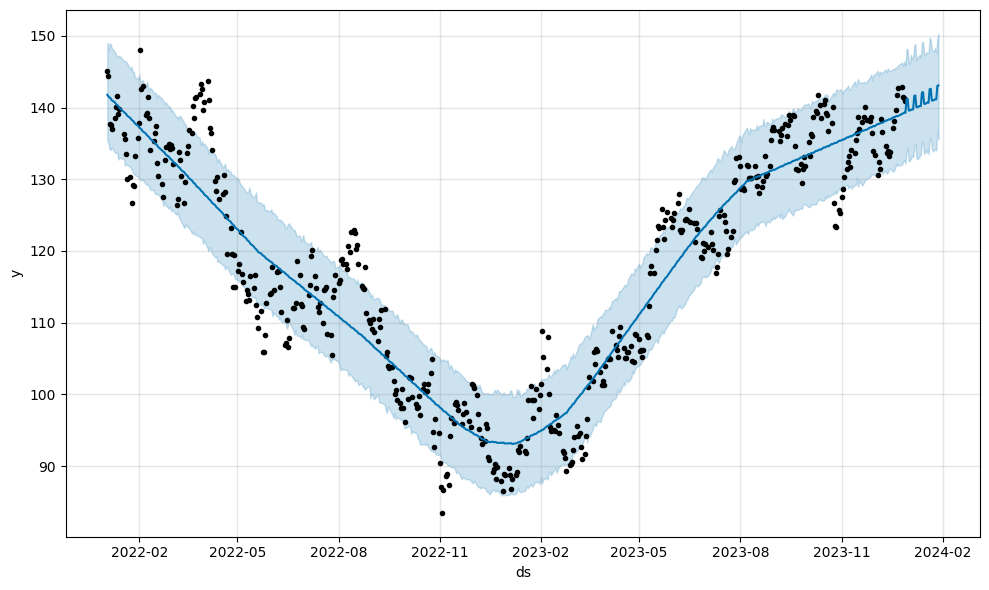

In [ ]:
figure=model.plot(forecast,xlabel='ds', ylabel='y')
# Here black dots is tthe actual price of google and blue is the forecasted price

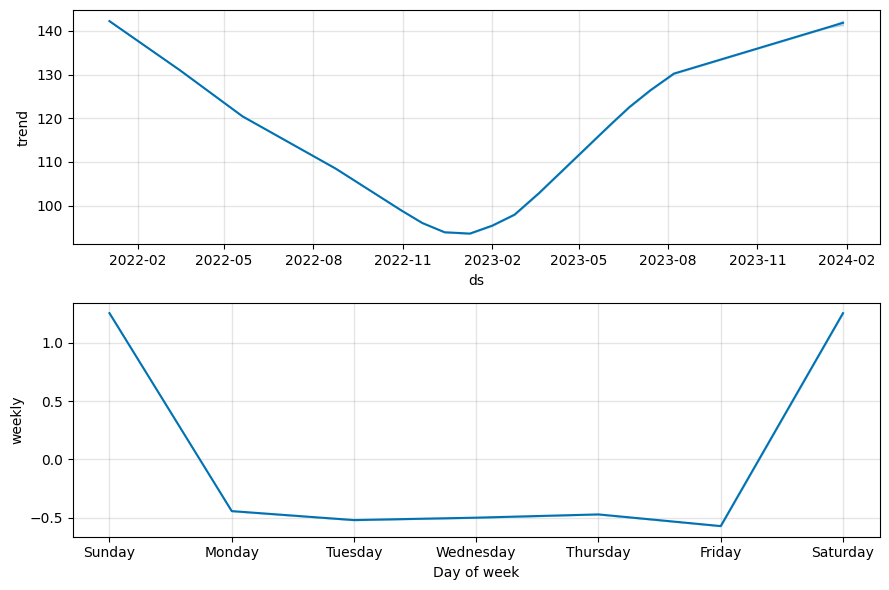

In [ ]:
# Plotting weekly trend and overall trend
figure2=model.plot_components(forecast)

##Downloading the Forecast data

In [ ]:
# To download the forecasted file directly
from google.colab import files
forecast.to_csv("GOOGLE_stock_forecast.csv")
files.download('GOOGLE_stock_forecast.csv')

**Reference:**
1.   Jha, Abhishek. "Tesla Stock Price Prediction using Facebook Prophet". Coursera, www.coursera.org/learn/tesla-stock-price-prediction-facebook-prophet/course-inbox.
2.   "Prophet Installation". facebook.github.io, 18 жовт. 2023, facebook.github.io/prophet/docs/installation.html.
3.   "yfinance". PyPI, pypi.org/project/yfinance. Останній перегляд 14 січ. 2024.
4.   "DF not recognizing Date as a column · Issue #530 · ranaroussi/yfinance". GitHub, github.com/ranaroussi/yfinance/issues/530. Останній перегляд 14 січ. 2024.




```

